In [44]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [45]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [46]:
def file_extraction(path):
    directories = glob.glob(path + '\*')
    tfiles = []
    files = []
    for d in directories:
        tfiles.extend(glob.glob(d + '\*'))
    for f in tfiles:
        if(target_file in f):
            files.append(f)
    return files

In [47]:
def file_to_panda(files):
    data = []
    for f in files:
        x = pd.read_json(f, orient='index')
        name = os.path.splitext(f)[0]
        name += '_MIX.json'
        x.name = name
        data.append(x)
    return data

In [48]:
def select_features(d):
    y = d.drop(undesired_features, axis=0)
    y = y.transpose()
    y.name = d.name
    return y

In [49]:
def write(d):
    d.to_json(d.name)

In [50]:
def merge(data, col):
    df = pd.DataFrame(columns=col)
    for d in data:
        df = df.append(d.transpose(), ignore_index=True)
    df.name = path + '\insight_all.json'
    return df

In [51]:
def column_extractor(data):
    mylist = []
    for d in data:
        mylist.extend(d.transpose().columns)
    return list(dict.fromkeys(mylist))

In [52]:
path = r'C:\Users\Ithan Velarde\Desktop\Stage 2020\Horse Data\Small_dataset'
target_file = 'insight.json'
undesired_features = ['id', 'acidose', 'energy_hr', 'energy_speed', 'bpm_after_effort', 'bpm_after_15_min', 'v200', 'model',
                      'best_200', 'best_250', 'best500', 'best_600', 'mean_hr_first_trot', 'mean_speed_first_trot', 
                      'mean_symmetry_first_trot', 'mean_regularity_first_trot', 'mean_hr_first_canter', 
                      'mean_speed_first_canter', 'mean_regularity_first_canter', 'is_gallop', 'rating', 'sex', 'age_days']

In [53]:
files = file_extraction(path)
data = file_to_panda(files)
columns = column_extractor(data)
df = merge(data, columns)
df, df.name = df.drop(undesired_features, axis=1), df.name
df.describe()

,max_heart_rate,max_stride_frequency,max_stride_length,max_speed,bpm_at_end,stride_frequency_at_60,stride_length_at_60,duration,work_duration_seconds,distance,...,time_best_600,time_best_800,time_best_1000,split_0_200,split_200_400,split_400_600,split_600_800,split_800_1000,split_1000_1200,split_1200_1400
count,290,310,288,288,281,287,287,311,310,311,...,286.0,278.00,276.0,289.0,288.0,286.0,278.0,276.0,276.0,271.0
unique,88,46,88,121,78,42,46,59,169,228,...,158.0,159.00,179.0,121.0,104.0,93.0,100.0,95.0,100.0,90.0
top,215,100,152,207,53,115,145,33,0,0,...,36.0,48.33,103.5,24.0,22.0,22.0,20.5,20.0,20.5,23.0
freq,15,21,10,8,12,30,22,23,21,21,...,7.0,10.00,6.0,13.0,13.0,14.0,13.0,15.0,14.0,13.0


In [54]:
train_set, test_set = split_train_test(df, 0.2)

In [55]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy="median"))])
X = pipeline.fit_transform(train_set)

In [56]:
X.shape

(249, 27)

In [57]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [58]:
y = kmeans.predict(X)

In [59]:
train_set.columns

Index(['max_heart_rate', 'max_stride_frequency', 'max_stride_length',
       'max_speed', 'bpm_at_end', 'stride_frequency_at_60',
       'stride_length_at_60', 'duration', 'work_duration_seconds', 'distance',
       'work_distance_meters', 'intensity', 'symmetry', 'regularity',
       'max_acceleration', 'time_best_200', 'time_best_400', 'time_best_600',
       'time_best_800', 'time_best_1000', 'split_0_200', 'split_200_400',
       'split_400_600', 'split_600_800', 'split_800_1000', 'split_1000_1200',
       'split_1200_1400'],
      dtype='object')

[silhouette] >Determining optimal [euclidean] clustering by silhouette score..


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 300.18it/s]


[clusteval] >Fin.


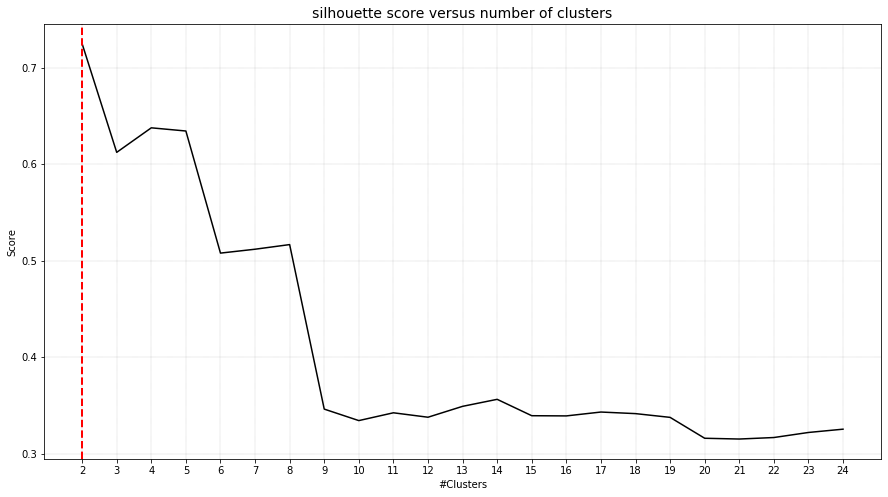

[silhouette] >Estimated number of n_clusters: 2, average silhouette_score=0.725


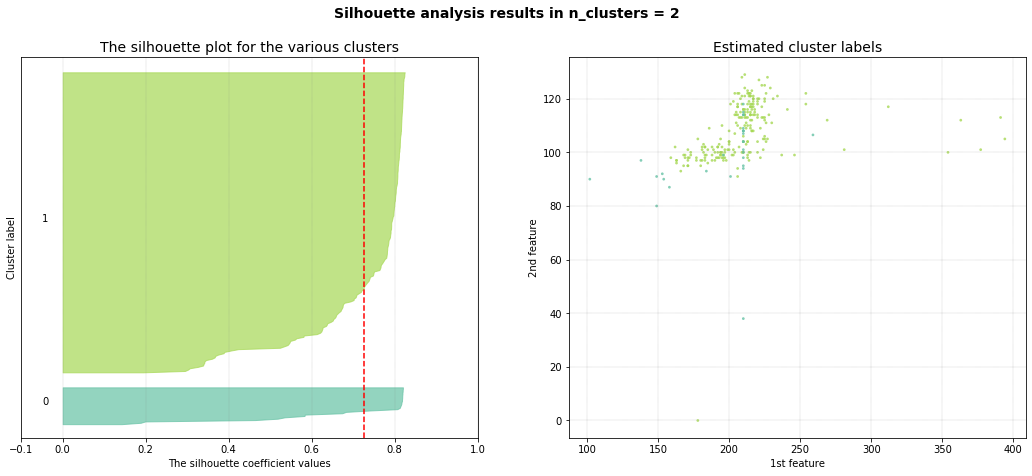

In [60]:
# Import library
from clusteval import clusteval

# Set parameters, as an example dbscan
ce = clusteval(method='silhouette')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(X)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(X)

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']